<a href="https://colab.research.google.com/github/dinuka-rp/nerdy-panda/blob/main/Prototype/Data%20Collection/data_mining_nfts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining NFT Data

## 2.1. NFT Data Collection 

OpenSea provides different APIs for fetching NFTs data. We will be using 2 of them:
- [OpenSea Assets API](https://docs.opensea.io/reference#getting-assets)
- [OpenSea Events API](https://docs.opensea.io/reference#retrieving-asset-events)

```

### 2.1.2. Fetching Data from OpenSea APIs

We will use Python to fetch data from 2 OpenSea APIs:

* [OpenSea Assets API](https://docs.opensea.io/reference#getting-assets): We will be using this API to retrieve the following data about each NFT:

    - The Meebit's Id.
    - The creator's username and address. The creator is the person who minted the Meebit to the blockchain.
    - The owner's username and address.
    - The Meebit's traits.
    - The number of times the Meebit has been sold.

* [OpenSea Events API](https://docs.opensea.io/reference#retrieving-asset-events): We will be using this API to retrieve the following data about each Meebit’s sale transaction:

    - The Meebit's Id.
    - The seller's username and address.
    - The buyer's username and address.
    - The sale's timestamp.
    - The sale transaction's hash.
    - The price.
    - The token used for the sale.
    - The price in USD.
    - If the sale is a bundle of Meebits.

I prepared [2 python functions](https://github.com/adilmoujahid/data-mining-nfts/blob/main/helpers.py) ```parse_meebit_data(meebit_dict)``` and ```parse_sale_data(sale_dict)``` for parsing the data that we’ll fetch from the OpenSea APIs. 

Next, from a Jupyter notebook, we import the Python libaries that we'll use for the analysis.

## Mount Google Drive



In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
%matplotlib inline

In [9]:
# from helpers import parse_meebit_data, parse_sale_data
import requests
import pandas as pd
import datetime, os

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')

In [10]:
collection_dict = {} # {collection name: total NFTs in the collection}
collection_slug = "boredapeyachtclub"

## Get Collection stats
to get the count of NFTs in a collection - this is needed to calculate rarity

Can get this by calling the collection stats endpoint for each asset using the collection slug.

Store this amount in an in-memory dictionary, so that the endpoint doesn't have to be called for each NFT.

In [14]:
def get_collection_total_supply_from_stats(collection_slug):
  url = "https://api.opensea.io/api/v1/collection/boredapeyachtclub/stats"

  payload={}
  headers = {
    'x-api-key': '9ef4a36cc8064a929723d5af5a3c3531',
    'Cookie': '__cf_bm=EVZwjesj4IUTDZ46LVzydsiYMUCio2BVM3leYwyewM8-1644475667-0-AdheWp/egmMJxedEP1mAp5s0WPmmEhj6fBlVUM+3RJRHlESFcsbJdv7f8/03C9Fp8jhEXmtEAPQgMhjFaqSrsPE='
  }

  response = requests.request("GET", url, headers=headers, data=payload)

  print(response.text)

  total_supply = response.json()['stats']['total_supply']

  collection_dict[collection_slug] = total_supply

  return total_supply

In [16]:
get_collection_total_supply_from_stats(collection_slug)

{"stats":{"one_day_volume":746.98,"one_day_change":-0.11498406454746864,"one_day_sales":7.0,"one_day_average_price":106.71142857142857,"seven_day_volume":9067.900999999996,"seven_day_change":-0.716946086246689,"seven_day_sales":81.0,"seven_day_average_price":111.94939506172835,"thirty_day_volume":74552.58360000003,"thirty_day_change":0.2970499356223441,"thirty_day_sales":708.0,"thirty_day_average_price":105.30025932203394,"total_volume":389738.8434963736,"total_sales":24584.0,"total_supply":9999.0,"count":9999.0,"num_owners":6313,"average_price":15.853353542807257,"num_reports":65,"market_cap":1119382.0012222216,"floor_price":91.0}}


9999.0

In [17]:
collection_dict[collection_slug]

9999.0

# Helper Methods

In [ ]:
assets_file_path = "/content/drive/MyDrive/Datasets/FYP/bayc-nft-assets" #Bored Ape Yacht Club
# assets_file_path = "/content/drive/MyDrive/Datasets/FYP/cryptokitties-nft-assets"
# assets_file_path = "/content/drive/MyDrive/Datasets/FYP/collected-nft-assets"

In [ ]:
# log_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [18]:
def parse_nft_asset_data(nft_dict):

    try:
        collection_slug = nft_dict['collection']['slug']
        
        #  get Collection total supply of tokens - to calculate rarity of each NFT
        # check if the slug is available in the collection_dict first
        try:
          total_supply = collection_dict[collection_slug]
        except:
          total_supply = get_collection_total_supply_from_stats(collection_slug)

    except:
        collection_slug = None

    
    nft_id = nft_dict['token_id']
    
    try:
        name = nft_dict['name']
    except:
        name = None

    try:
        asset_description = nft_dict['description']
    except:
        asset_description = None

    try:
        asset_contract_address = nft_dict['asset_contract']['address']
    except:
        asset_contract_address = None

    try:
        collection_name = nft_dict['collection']['name']
    except:
        collection_name = None
    try:
        collection_description = nft_dict['collection']['description']
    except:
        collection_description = None

    try:
        if nft_dict['collection']['safelist_request_status'] == 'verified':
          collection_verification = True
        else:
          collection_verification = False
    except:
        collection_verification = None

    try:
        creator_username = nft_dict['creator']['user']['username']
    except:
        creator_username = None
    try:
        creator_address = nft_dict['creator']['address']
    except:
        creator_address = None
    
    try:
        owner_username = nft_dict['owner']['user']['username']

    except:
        owner_username = None
    
    owner_address = nft_dict['owner']['address']
    # if (owner_address == "0x0000000000000000000000000000000000000000"):
    #   owner_address = None

    
    traits = nft_dict['traits']

    traits_string = ""

    # save total rarity in a separate column
    total_rarity = 0
    for trait in traits:
      # for each trait, extract the trait_count and calculate rarity

      if (total_supply) and (total_supply != 0):
        trait_rarity = 1/ (trait['trait_count']/total_supply)

        total_rarity += trait_rarity

      # save all trait type and values in a ; separated string. This will have to be split into an array when loaded - for content based filtering
      # lowercase -> remove any spaces between the words before adding into the string
      trait_type = trait['trait_type'].lower()
      trait_value = trait['value'].lower()

      trait_string = trait_type + trait_value
      trait_string.replace(" ", "")
      traits_string = traits_string + trait_string + ";"    # typevalue;typevalue

    num_sales = int(nft_dict['num_sales'])

    # this data may be valuable for a price prediction & to identify who owned the nft before and the transacted amount - might be able to get all these from the events api itself. 
    try:
        last_sale = nft_dict['last_sale']
    except:
        last_sale = None

    try:
        top_bid = nft_dict['top_bid']
    except:
        top_bid = None


    # save img urls, can be used to make the UIs colourful & attractive
    try:
        image_url = nft_dict['image_url']
    except:
        image_url = None

    try:
        collection_image_url = nft_dict['collection']['image_url']
    except:
        collection_image_url = None

    try:
        owner_profile_img_url = nft_dict['owner']['profile_img_url']
    except:
        owner_profile_img_url = None

    try:
        creator_profile_img_url = nft_dict['creator']['profile_img_url']
    except:
        creator_profile_img_url = None

    try:
        open_sea_link = nft_dict['permalink']
    except:
        open_sea_link = None


    result = {'nft_id': nft_id,
              'name': name,
              'asset_description': asset_description,
              'asset_contract_address': asset_contract_address,
              'collection_name': collection_name,
              'collection_description': collection_description,
              'collection_slug': collection_slug,
              'collection_verification':collection_verification,
              'creator_username': creator_username,
              'creator_address': creator_address,
              'creator_profile_img_url': creator_profile_img_url,
              'owner_username': owner_username,
              'owner_address': owner_address,
              'owner_profile_img_url': owner_profile_img_url,
              'traits_string': traits_string,
              'total_rarity': total_rarity,
              'num_sales': num_sales,
              'last_sale': last_sale,
              'top_bid': top_bid,
              'open_sea_link': open_sea_link,
              'image_url': image_url,
              }
    
    return result


def parse_sale_data(sale_dict):
    
    is_bundle = False

    if sale_dict['asset'] != None:
        nft_id = sale_dict['asset']['token_id']
    elif sale_dict['asset_bundle'] != None:
        nft_id = [asset['token_id'] for asset in sale_dict['asset_bundle']['assets']]
        is_bundle = True
    
    
    seller_address = sale_dict['seller']['address']
    buyer_address = sale_dict['winner_account']['address']
    
    try:
        seller_username = sale_dict['seller']['user']['username']
    except:
        seller_username = None    
    try:
        buyer_username = sale_dict['winner_account']['user']['username']
    except:
        buyer_username = None
    
    timestamp = sale_dict['transaction']['timestamp']
    total_price = float(sale_dict['total_price'])
    payment_token = sale_dict['payment_token']['symbol']
    usd_price = float(sale_dict['payment_token']['usd_price'])
    transaction_hash = sale_dict['transaction']['transaction_hash']
    

    result = {'is_bundle': is_bundle,
              'nft_id': nft_id,
              'seller_address': seller_address,
              'buyer_address': buyer_address,
              'buyer_username': buyer_username,
              'seller_username':seller_username,
              'timestamp': timestamp,
              'total_price': total_price, 
              'payment_token': payment_token,
              'usd_price': usd_price,
              'transaction_hash': transaction_hash}
    
    return result

# Getting NFT Assets Data

The source code below collects assets data about the 20,000 NFTs. The API has a limit of 50 items per call, and therefore we need to create a loop with 100 iterations to collect the required amount of NFT data.

## **TODO: get data from popular collections that have had transactions before**

 - new NFTs don't have much events data to offer.
 - Both data sets will be needed to show how effective the Recommendation Model is for different scenarios.

## Fetch NFT Asset Data

In [22]:
def fetch_nft_asset_data():
  url = "https://api.opensea.io/api/v1/assets"

  for i in range(0, 1):
      # offset= 50 * i

      querystring = {
          "token_ids":"9974",
          "order_direction": "desc",
          # "offset": offset,
          # "limit": "50",
          "collection": collection_slug
          }

      headers = {'x-api-key': "9ef4a36cc8064a929723d5af5a3c3531"}

      response = requests.get(url, params=querystring, headers=headers)
      
      # print(response.json()['assets'])
      if response.status_code != 200:
          print('error')
          break
      
      #Getting NFT data
      nfts = response.json()['assets']

      #Parsing NFT data
      parsed_nft_assets = [parse_nft_asset_data(nft) for nft in nfts]

      # convert json to pandas dataframe
      nft_assets_df = pd.DataFrame(parsed_nft_assets)
      return nft_assets_df


      # save dataframe to csv & save csv to Google Drive
      # nft_assets_df.to_csv(assets_file_path, mode='a', sep='\t', index=False, header=(not os.path.exists(assets_file_path)), encoding='utf-8')

      # save dataframe to json and save json to Google Drive
      #  - difficult to append. Need to read all existing data and then append
      # nft_assets_df.to_json(assets_file_path, index=False, header=(not os.path.exists(assets_file_path)), encoding='utf-8')

      # save dataframe to MongoDB


In [24]:
nft_assets_df = fetch_nft_asset_data()

nft_assets_df.head()

,nft_id,name,asset_description,asset_contract_address,collection_name,collection_description,collection_slug,collection_verification,creator_username,creator_address,creator_profile_img_url,owner_username,owner_address,owner_profile_img_url,traits_string,total_rarity,num_sales,last_sale,top_bid,open_sea_link,image_url
0,9974,None,None,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,boredapeyachtclub,True,BoredApeYachtClub,0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03,https://storage.googleapis.com/opensea-static/...,mo31985,0x994cf01f34c51426bcb12bd30ff7079e280e1140,https://storage.googleapis.com/opensea-static/...,;earringsilver hoop;backgroundaquamarine;furda...,204.031386,2,"{'asset': {'decimals': 0, 'token_id': '9974'},...",None,https://opensea.io/assets/0xbc4ca0eda7647a8ab7...,https://lh3.googleusercontent.com/G60LFd7Xhb4-...


## Read CSV - check collected NFT data

In [ ]:
nft_assets_df = pd.read_csv(assets_file_path, sep='\t')

nft_assets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nft_id                   10000 non-null  int64  
 1   name                     0 non-null      float64
 2   asset_description        0 non-null      float64
 3   asset_contract_address   10000 non-null  object 
 4   collection_name          10000 non-null  object 
 5   collection_description   10000 non-null  object 
 6   collection_slug          10000 non-null  object 
 7   collection_verification  10000 non-null  bool   
 8   creator_username         10000 non-null  object 
 9   creator_address          10000 non-null  object 
 10  creator_profile_img_url  10000 non-null  object 
 11  owner_username           7125 non-null   object 
 12  owner_address            10000 non-null  object 
 13  owner_profile_img_url    10000 non-null  object 
 14  traits                 

In [ ]:
# remove duplicated NFTs from df

# nft_assets_df.duplicated(subset=['nft_id']).sum()

# nft_assets_df.loc[nft_assets_df.duplicated(), :]

# nft_assets_df=nft_assets_df.drop_duplicates(subset=['nft_id'], keep="first")

# Analyze NFT Assets Data

In [ ]:
# number of unique names
len(nft_assets_df['traits'].unique())

# nft_assets_df['traits'][3]
# nft_assets_df['traits'][0]

10000

Inspect data columns with no values

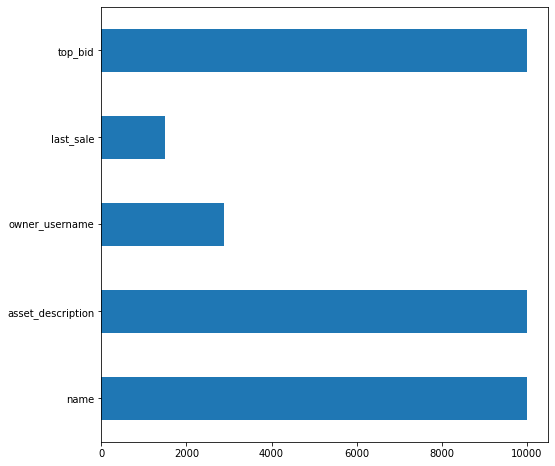

In [ ]:
data = nft_assets_df

data_null = data.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [ ]:
print(nft_assets_df.shape)

(10000, 19)


In [ ]:
nft_assets_df.head()

,nft_id,name,asset_description,asset_contract_address,collection_name,collection_description,collection_slug,collection_verification,creator_username,creator_address,creator_profile_img_url,owner_username,owner_address,owner_profile_img_url,traits,num_sales,last_sale,top_bid,image_url
0,9974,NaN,NaN,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,boredapeyachtclub,True,BoredApeYachtClub,0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03,https://storage.googleapis.com/opensea-static/...,mo31985,0x994cf01f34c51426bcb12bd30ff7079e280e1140,https://storage.googleapis.com/opensea-static/...,"[{'trait_type': 'Eyes', 'value': 'Eyepatch', '...",2,"{'asset': {'token_id': '9974', 'decimals': 0},...",NaN,https://lh3.googleusercontent.com/G60LFd7Xhb4-...
1,9973,NaN,NaN,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,boredapeyachtclub,True,BoredApeYachtClub,0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03,https://storage.googleapis.com/opensea-static/...,accubed,0x6e0c6bf243232bcfef85a88eb61062626ffc1e2a,https://storage.googleapis.com/opensea-static/...,"[{'trait_type': 'Fur', 'value': 'Dmt', 'displa...",1,"{'asset': {'token_id': '9973', 'decimals': 0},...",NaN,https://lh3.googleusercontent.com/-4Pz6B1FkH8k...
2,9949,NaN,NaN,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,boredapeyachtclub,True,BoredApeYachtClub,0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03,https://storage.googleapis.com/opensea-static/...,NaN,0xd3b38f645ac56e0b8ab7b6071a1cfc12a6e8c05d,https://storage.googleapis.com/opensea-static/...,"[{'trait_type': 'Mouth', 'value': 'Grin Gold G...",7,"{'asset': {'token_id': '9949', 'decimals': 0},...",NaN,https://lh3.googleusercontent.com/RcXAgekWgaH5...
3,9972,NaN,NaN,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,boredapeyachtclub,True,BoredApeYachtClub,0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03,https://storage.googleapis.com/opensea-static/...,ARC001,0x0b31cc882a2b3937257ccf785b04b7c8f931207b,https://storage.googleapis.com/opensea-static/...,"[{'trait_type': 'Eyes', 'value': 'Hypnotized',...",1,"{'asset': {'token_id': '9972', 'decimals': 0},...",NaN,https://lh3.googleusercontent.com/vcL_TRKR8FRq...
4,9948,NaN,NaN,0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,boredapeyachtclub,True,BoredApeYachtClub,0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03,https://storage.googleapis.com/opensea-static/...,MAJE,0xecba5f51925e6ccec26da38dcd7d5305f6bdfbcb,https://storage.googleapis.com/opensea-static/...,"[{'trait_type': 'Hat', 'value': ""Trippy Captai...",2,"{'asset': {'token_id': '9948', 'decimals': 0},...",NaN,https://lh3.googleusercontent.com/jMsgIXhlR0Xe...


In [ ]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,nft_id,name,asset_description,num_sales,top_bid
count,10000.00000,0.0,0.0,10000.000000,0.0
mean,4999.50000,NaN,NaN,2.442800,NaN
std,2886.89568,NaN,NaN,2.039349,NaN
min,0.00000,NaN,NaN,0.000000,NaN
10%,999.90000,NaN,NaN,0.000000,NaN
25%,2499.75000,NaN,NaN,1.000000,NaN
50%,4999.50000,NaN,NaN,2.000000,NaN
75%,7499.25000,NaN,NaN,3.000000,NaN
90%,8999.10000,NaN,NaN,5.000000,NaN
max,9999.00000,NaN,NaN,15.000000,NaN


In [ ]:
# data_new_stripped = data.drop([ 'name', 'asset_description', 'top_bid'],axis=1)

In [ ]:
# import seaborn as sns

# plt.figure(figsize=(25,20))
# sns.set(font_scale=1)
# sns.heatmap(data.corr(),annot=True);

## Cluster NFTs based on Trait Rarity

calculate rarity of each NFT and have a separate column for this in the dataframe

*Rarity Score for a Trait Value = 1 / ([Number of Items with that Trait Value] / [Total Number of Items in Collection])*

### Failed attempt at extracting json saved in csv

In [ ]:
import json

In [ ]:
result = data.iloc[0:].to_json()
parsed = json.loads(result)
json_string = json.dumps(parsed, indent=4)  

print(json_string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
parsed[0]['traits']

'[{\'trait_type\': \'Eyes\', \'value\': \'Eyepatch\', \'display_type\': None, \'max_value\': None, \'trait_count\': 333, \'order\': None}, {\'trait_type\': \'Hat\', \'value\': "Seaman\'s Hat", \'display_type\': None, \'max_value\': None, \'trait_count\': 420, \'order\': None}, {\'trait_type\': \'Clothes\', \'value\': \'Rainbow Suspenders\', \'display_type\': None, \'max_value\': None, \'trait_count\': 135, \'order\': None}, {\'trait_type\': \'Background\', \'value\': \'Aquamarine\', \'display_type\': None, \'max_value\': None, \'trait_count\': 1266, \'order\': None}, {\'trait_type\': \'Fur\', \'value\': \'Dark Brown\', \'display_type\': None, \'max_value\': None, \'trait_count\': 1352, \'order\': None}, {\'trait_type\': \'Earring\', \'value\': \'Silver Hoop\', \'display_type\': None, \'max_value\': None, \'trait_count\': 882, \'order\': None}, {\'trait_type\': \'Mouth\', \'value\': \'Tongue Out\', \'display_type\': None, \'max_value\': None, \'trait_count\': 202, \'order\': None}]'

once saved in a CSV column/ pandas column, the array converts into a string. So, nothing will work after that.

In [ ]:
# loop through data frame
# for index, row in data.iterrows():
#   traits = row['traits']
#   print(traits)
#   # traits_string = "{'traits':" + traits + "}"
#   # traits_string = '''
#   #                 {"traits":{traits}}
#   #                 '''

#   # traits_json = json.loads(traits_string)
#   # parsed = json.loads(traits)
#   # traits_string = json.dumps(traits, indent=4)  

#   # print(traits_string)
#   # break;

#   # traits_json = json.loads(traits)

#   for trait in traits:
#     print(trait)
#     trait_string = json.dumps(trait, indent=4)  
#     print(trait_string)
#     break;
#   break

    # print(row['nft_id'], row['traits'])
# calculate rarity for each trait

# add all rarity counts and calculate total rarity for each NFT


[{'trait_type': 'Eyes', 'value': 'Eyepatch', 'display_type': None, 'max_value': None, 'trait_count': 333, 'order': None}, {'trait_type': 'Hat', 'value': "Seaman's Hat", 'display_type': None, 'max_value': None, 'trait_count': 420, 'order': None}, {'trait_type': 'Clothes', 'value': 'Rainbow Suspenders', 'display_type': None, 'max_value': None, 'trait_count': 135, 'order': None}, {'trait_type': 'Background', 'value': 'Aquamarine', 'display_type': None, 'max_value': None, 'trait_count': 1266, 'order': None}, {'trait_type': 'Fur', 'value': 'Dark Brown', 'display_type': None, 'max_value': None, 'trait_count': 1352, 'order': None}, {'trait_type': 'Earring', 'value': 'Silver Hoop', 'display_type': None, 'max_value': None, 'trait_count': 882, 'order': None}, {'trait_type': 'Mouth', 'value': 'Tongue Out', 'display_type': None, 'max_value': None, 'trait_count': 202, 'order': None}]
[
"["


In [ ]:
import ast
import numpy as np
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))


df2 = pd.read_csv(assets_file_path, converters={'traits': from_np_array})
print(df2)

## Clean Asset Data

*   Remove NFTs that have no text that can be worked with at all (descriptions/ sensible names - nouns, non-stop words,etc.) - can have this check when parsing as well (check later)


## Getting NFT sales transactions data

The source code below collects all sale transactions data. The API has a limit of 50 items per call, and therefore we need to create a loop to collect all sale transactions data.

https://docs.cryptosheets.com/providers/opensea/retrieving-events/

Assets and events will most likely match only in NFTs from collections - that have had a few transactions.

Otherwise, events data can be used only to train a price prediction algorithm.

In [ ]:
sales_file_path = "/content/drive/MyDrive/Datasets/FYP/bayc-nft-sales"
# sales_file_path = "/content/drive/MyDrive/Datasets/FYP/collected-nft-sales"

In [ ]:
url = "https://api.opensea.io/api/v1/events"

for i in range(0, 200):
    offset= 50 * i

    # query events for each nft asset

    querystring = {
                   "event_type":"successful",
                   "only_opensea":"true",
                   "offset":offset,
                   "limit":"50",
                   }

    headers = {"Accept": "application/json"}

    response = requests.request("GET", url, headers=headers, params=querystring)

    
    # print(i)
    if response.status_code != 200:
        print('error')
        break
    
    #Getting meebits sales data
    nft_sales = response.json()['asset_events']

    if nft_sales == []:
        break
    
    #Parsing meebits sales data
    parsed_nft_sales = [parse_sale_data(sale) for sale in nft_sales]

    # convert json to pandas dataframe
    nft_sales_df = pd.DataFrame(parsed_nft_sales)

  # save dataframe to a separate csv & save csv to Google Drive
    nft_sales_df.to_csv(sales_file_path, mode='a', sep='\t', index=False, header=(not os.path.exists(sales_file_path)), encoding='utf-8')

## 2.2. Analyzing Meebits Data and Meebits Sale Transactions

Now that we have the data in MongoDB, we can start analyzing it. 

### 2.2.1. Reading the Data
We start by reading both the assets data and the transactions data into 2 Pandas DataFrames.

In [ ]:
meebits = meebits_collection.find()
meebits_df = pd.DataFrame(meebits)

meebit_sales = sales_collection.find()
meebit_sales_df = pd.DataFrame(meebit_sales)

In [ ]:
print("The database has information about %d Meebits." % len(meebits_df))
print("The database has information about %d Meebits sale transactions." % len(meebit_sales_df))

### 2.2.2. Getting Top 10 Meebits Creators

In [ ]:
creators = []
for creator_address in meebits_df['creator_address'].value_counts().index[:10]:
    creator_data = {}
    creator_data['creator_address'] = creator_address
    creator_data['creator_username'] = meebits_df[meebits_df['creator_address'] == creator_address]['creator_username'].iloc[0]
    creator_data['number_meebits'] = len(meebits_df[meebits_df['creator_address'] == creator_address])
    creators.append(creator_data)

pd.DataFrame(creators)

In [ ]:
#### Getting total number of Meebit Creators and Owners.
print("There are %d unique Meebit creators." % len(meebits_df['creator_address'].unique()))
print("There are %d unique Meebit owners." % len(meebits_df['owner_address'].unique()))

### 2.2.3. Getting Stats about Bundle/Single Sales and Types of Payment

In [ ]:
meebit_sales_df['is_bundle'].value_counts()

In [ ]:
meebit_sales_df[meebit_sales_df['is_bundle'] == False]['payment_token'].value_counts()

### 2.2.4. Filering Sale Transactions and Adding New Features

To make the analysis easier, we will only focus on single sales done in ETH or WETH.

In [ ]:
meebit_sales_df = meebit_sales_df[(meebit_sales_df['payment_token'] != 'USDC') & (meebit_sales_df['is_bundle'] == False)].copy()

Next, we do some data cleaning and we add a new feature

In [ ]:
# Parsing dates
meebit_sales_df['timestamp'] = pd.to_datetime(meebit_sales_df['timestamp'])
# Converting sales price from WEI to ETH
meebit_sales_df['total_price'] = meebit_sales_df['total_price']/10.**18
# Calculating the sale prices in USD
meebit_sales_df['total_price_usd'] = meebit_sales_df['total_price'] * meebit_sales_df['usd_price']

### 2.2.5. Meebits Sales Timelines

#### Total Number of Sales per Day

In [ ]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').count()['total_price']
ax = data.plot.bar(figsize=(18, 6))

ax.set_alpha(0.8)
ax.set_title("Number of Meebits Sales per Day", fontsize=18)
ax.set_ylabel("Number of Meebits Sales", fontsize=18)

#https://github.com/pandas-dev/pandas/issues/1918
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(data.index.to_series().dt.strftime("%d %b %Y")))

#https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+40, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=45)

#### Total Sales per Day in ETH

In [ ]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').sum()['total_price']
ax = data.plot(figsize=(18,6), color="red", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Total Meebit Sales in ETH", fontsize=18)
ax.set_ylabel("Sales in ETH", fontsize=18);

dates = list(data.index)
values = list(data.values)

for i, j in zip(dates, values):
    ax.annotate(s="{:.0f}".format(j), xy=(i, j+200), rotation=45)

#### Total Sales per day in USD

In [ ]:
data = meebit_sales_df[['timestamp', 'total_price_usd']].resample('D', on='timestamp').sum()['total_price_usd']
ax = data.plot(figsize=(18,6), color="red", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Total Meebit Sales in Million USD", fontsize=18)
ax.set_ylabel("Sales in Million USD", fontsize=18);

dates = list(data.index)
values = list(data.values)

for i, j in zip(dates, values):
    ax.annotate(s="{:.2f}".format(j/10.**6), xy=(i, j), rotation=45)

### 2.2.6. Meebits Prices Timelines 

#### Average Meebit Price per Day in ETH 

In [ ]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').mean()['total_price']
ax = data.plot(figsize=(18,6), color="green", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Average Meebit Price in ETH", fontsize=18)
ax.set_ylabel("Average Price in ETH", fontsize=18);
#ax.annotate(s='sdsdsds', xy=(1, 1))

dates = list(data.index)
values = list(data.values)

for i, j in zip(dates, values):
    ax.annotate(s="{:.2f}".format(j), xy=(i, j+.2), rotation=45)

#### Floor Meebit Price per Day in ETH

In [ ]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').min()['total_price']
ax = data.plot(figsize=(18,6), color="orange", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Floor Meebit Price in ETH", fontsize=18)
ax.set_ylabel("Floor Price in ETH", fontsize=18);

dates = list(data.index)
values = list(data.values)

for d, v in zip(dates, values):
    ax.annotate(s="{:.2f}".format(v), xy=(d, v), rotation=45)

#### Max Meebit Price per Day in ETH

In [ ]:
data = meebit_sales_df[['timestamp', 'total_price']].resample('D', on='timestamp').max()['total_price']
ax = data.plot(figsize=(18,6), color="red", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Max Meebit Price in ETH", fontsize=18)
ax.set_ylabel("Max Price in ETH", fontsize=18);

dates = list(data.index)
values = list(data.values)

for i, j in zip(dates, values):
    ax.annotate(s="{:.0f}".format(j), xy=(i, j+30), rotation=45)

### 2.2.6. Analyzing Meebits' Sellers and Buyers

In [ ]:
print("There are %d unique Meebit sellers." % len(meebit_sales_df['seller_address'].unique()))
print("There are %d unique Meebit buyers." % len(meebit_sales_df['buyer_address'].unique()))

#### Getting Top 10 Meebits Buyers

In [ ]:
buyers = []
for buyer_address in meebit_sales_df['buyer_address'].value_counts().index[:10]:
    buyer_data = {}
    buyer_data['buyer_address'] = buyer_address
    buyer_data['buyer_username'] = meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address]['buyer_username'].iloc[0]
    buyer_data['number_buys'] = len(meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address])
    buyer_data['min_price'] = meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address]['total_price'].min()
    buyer_data['max_price'] = meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address]['total_price'].max()
    buyer_data['mean_price'] = meebit_sales_df[meebit_sales_df['buyer_address'] == buyer_address]['total_price'].mean()
    buyers.append(buyer_data)
    
pd.DataFrame(buyers)

#### Getting Top 10 Meebits Sellers

In [ ]:
sellers = []
for seller_address in meebit_sales_df['seller_address'].value_counts().index[:10]:
    seller_data = {}
    seller_data['seller_address'] = seller_address
    seller_data['seller_username'] = meebit_sales_df[meebit_sales_df['seller_address'] == seller_address]['seller_username'].iloc[0]
    seller_data['number_sales'] = len(meebit_sales_df[meebit_sales_df['seller_address'] == seller_address])
    seller_data['min_price'] = meebit_sales_df[meebit_sales_df['seller_address'] == seller_address]['total_price'].min()
    seller_data['max_price'] = meebit_sales_df[meebit_sales_df['seller_address'] == seller_address]['total_price'].max()
    seller_data['mean_price'] = meebit_sales_df[meebit_sales_df['seller_address'] == seller_address]['total_price'].mean()
    sellers.append(seller_data)
    
pd.DataFrame(sellers)

#### Intersection of Top 10 Buyers and Top 10 sellers

In [ ]:
top_10_buyers = meebit_sales_df['buyer_address'].value_counts().index[:10]
top_10_sellers = meebit_sales_df['seller_address'].value_counts().index[:10]
print(list(set(top_10_buyers) & set(top_10_sellers)))

#### Getting Number of Sales between same Buyers and Sellers 

In [ ]:
(meebit_sales_df['seller_address'] + meebit_sales_df['buyer_address']).value_counts().value_counts()